In [16]:
import sys
sys.path.append('../')
from heptrkx import *
from heptrkx import master
from heptrkx.nx_graph import utils_plot, utils_data
from heptrkx.preprocess import utils_mldata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
import numpy as np
import networkx as nx
from scipy.cluster.vq import vq, kmeans, whiten
import copy

In [17]:
# Construct event
source_dir = '../data/'
evtid = 21000
event = master.Event(source_dir, evtid)
event.read(evtid)
event.remove_noise_hits()

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
0,0,1,-86.796204,-14.730400,-1502.5,7,2,1,21000,238697583478833152,...,-1.0,16.0,0.255939,0,88.037300,-2.973482,-3.531134,1505.077026,1502.5,0.256832
1,1,2,-68.703499,-10.899000,-1502.5,7,2,1,21000,671044522095935488,...,-1.0,14.0,0.532420,0,69.562630,-2.984266,-3.766317,1504.109497,1502.5,0.537899
2,2,3,-56.138302,-9.508870,-1502.5,7,2,1,21000,774632811083595776,...,1.0,11.0,1.060757,0,56.937927,-2.973802,-3.966414,1503.578491,1502.5,1.064789
3,3,4,-60.311401,-4.972310,-1502.5,7,2,1,21000,945760182355361792,...,-1.0,13.0,1.182979,0,60.516022,-3.059335,-3.905516,1503.718262,1502.5,1.185194
4,4,5,-89.405701,-8.816870,-1502.5,7,2,1,21000,837680800685096960,...,1.0,13.0,1.405517,0,89.839394,-3.043294,-3.510903,1505.183472,1502.5,1.399522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125569,125569,125570,-884.635986,117.088997,2944.5,18,12,97,21000,45036683468472320,...,1.0,16.0,0.345542,47,892.351196,3.009999,1.909190,3076.746826,2944.5,0.331936
125571,125571,125572,-752.166016,71.006104,2944.5,18,12,97,21000,18015223143202816,...,1.0,13.0,1.239737,47,755.510132,3.047469,2.069515,3039.880859,2944.5,1.266754
125572,125572,125573,-826.395996,51.579300,2944.5,18,12,97,21000,391826086842859520,...,-1.0,11.0,1.609889,47,828.004089,3.079259,1.981031,3058.704102,2944.5,1.556278
125573,125573,125574,-884.333008,118.041000,2952.5,18,12,98,21000,45036683468472320,...,1.0,16.0,0.345542,47,892.176331,3.008897,1.911974,3084.353271,2952.5,0.332050


In [18]:
event_hits = event.hits
event_truth = event.truth
event_particles = event.particles



In [19]:
particles = np.unique(event.particles[(event.particles.nhits > 5) & (event.particles.pt > 0.5) ].particle_id)[0:2000]
print(len(particles))
# event.hits.particle_id

2000


In [20]:
event_hits[event_hits.particle_id==particles[0]]

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
22384,22384,22385,-9.576100,-30.949200,39.552200,8,2,116,21000,4503668346847232,...,-1.0,11.0,1.673555,7,32.396832,-1.870867,1.029263,51.126617,39.552200,1.672774
32033,32033,32034,-20.883200,-69.152901,80.733398,8,4,263,21000,4503668346847232,...,-1.0,11.0,1.673555,8,72.237328,-1.864074,0.962143,108.333344,80.733398,1.672408
39181,39181,39182,-32.667099,-111.300003,125.936996,8,6,427,21000,4503668346847232,...,-1.0,11.0,1.673555,9,115.994957,-1.856284,0.940701,171.216110,125.936996,1.672734
46139,46139,46140,-46.519001,-164.360992,182.634995,8,8,718,21000,4503668346847232,...,-1.0,11.0,1.673555,10,170.817307,-1.846612,0.929457,250.068176,182.634995,1.671469
46147,46147,46148,-46.960899,-166.162003,184.548004,8,8,719,21000,4503668346847232,...,-1.0,11.0,1.673555,10,172.670609,-1.846234,0.929186,252.731277,184.548004,1.671347
79677,79677,79678,-66.340599,-248.923996,272.399994,13,2,529,21000,4503668346847232,...,-1.0,11.0,1.673555,24,257.612579,-1.831252,0.921386,374.921326,272.399994,1.668811
87081,87081,87082,-87.199097,-353.285004,382.600006,13,4,796,21000,4503668346847232,...,-1.0,11.0,1.673555,25,363.887329,-1.812783,0.917273,528.012085,382.600006,1.669320
93927,93927,93928,-108.494003,-488.476990,524.000000,13,6,1187,21000,4503668346847232,...,-1.0,11.0,1.673555,26,500.380585,-1.789355,0.914360,724.539001,524.000000,1.669208
100370,100370,100371,-125.070000,-645.872009,687.400024,13,8,1757,21000,4503668346847232,...,-1.0,11.0,1.673555,27,657.870178,-1.762074,0.912760,951.478821,687.400024,1.668076
116879,116879,116880,-132.837006,-813.583984,861.799988,17,2,2187,21000,4503668346847232,...,-1.0,11.0,1.673555,40,824.357056,-1.732642,0.913129,1192.587036,861.799988,1.668451


In [21]:
# event.hits.particle_id.isin(particles)

# whether each particle is in fifteen_particles:
# event.hits.particle_id.isin(fifteen_particles)
hits = event.hits[event.hits.particle_id.isin(particles)]

# filter out all particles with less than 2 hits:
# hits = hits[event.hits.nhits > 5]
# particle
# hits


In [47]:
# hits.hit_id[21014]
hits = hits.sort_values(by=['r3'])

Create the graph G based on the hits dataframe

In [48]:
G = nx.Graph()
# for hit in hits:    
#     G.add_node(hit['hit_id'])

# need to store hit_id, particle_id, volume_id, layer_id, module_id, r, phi, z into nodes (hit_id is the node
#name)

for hit_idx, row in hits.iterrows():
    G.add_node(row['hit_id'], particle_id=row['particle_id'], pos=[row['r'], row['phi'], row['z']],\
               volume_id=row['volume_id'], layer_id=row['layer_id'])


# iterate through r
paths = {}# paths is a dictionary
for index, row in hits.iterrows():
    hit_id = row['hit_id']
    particle_id = row['particle_id']
    if particle_id not in paths:
        # initiate a new path (list of hit_id)
        paths[particle_id] = []
    paths[particle_id].append(hit_id)
# print(paths)

# for everything in paths, add edge to G
counter = 0
for path in paths: 
#     print(path)
#     print(paths[path])
    prev_hit = paths[path][0]
    for hit in paths[path]:
        if prev_hit != hit:
            G.add_edge(prev_hit, hit, solution=np.array([1]))
        prev_hit = hit



In [50]:
"""Split a graph G equally into N phi bins
Args:   G: a graph
        HITS: a pandas dataframe of hits
        N: number of phi bins
Return: a list of subgraphs that starts from phi = -pi, ordered in counter clockwise direction
"""
def split_graph_by_phi(G, hits, n=4):
    
    width = np.pi * 2 / n
    
    phi_bins = [[] for i in range(n)]        
    
    for index, row in hits.iterrows():
        phi = row['phi']

        bin_index = int((phi + np.pi) // width)
        # the zeroth bin starts at phi = -pi, clockwise
        phi_bins[bin_index].append(row['hit_id'])
        
    return [nx.subgraph(G, phi_bin) for phi_bin in phi_bins]

In [51]:
""" Takes in a graph list and output their union
"""
def graph_union(graph_list):
    G_union = nx.Graph()
    for graph in graph_list:
        G_union = nx.union(G_union, graph)
    return G_union

In [52]:
""" Plot all graphs in graph_list
"""
def plot_graphs(graph_list):
    for graph in graph_list:
        utils_plot.plot_networkx(graph)
        

In [54]:
""" Returns the number of connected segments in G
"""
def num_of_segments(G):
    return len([x for x in nx.connected_components(G)])

edge count in G_joint: 21414
node count in G_joint: 23698
edge count in G: 21698
node count in G: 23698
edges removed: 284

number of connected componnets in G: 2000
number of connected componnets in G_joint: 2284
The difference between the above two numbers must be equal to the number of edges removed


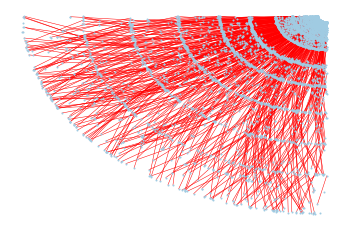

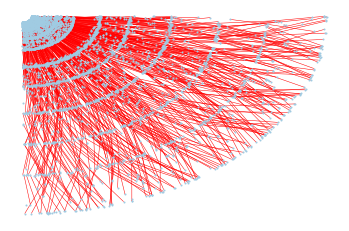

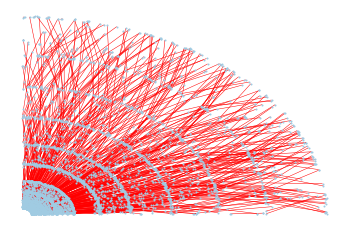

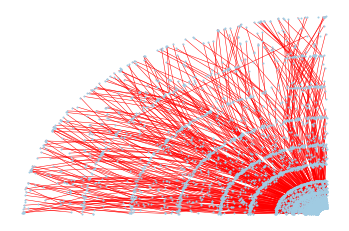

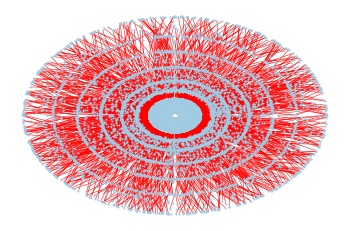

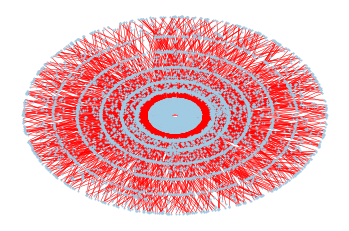

In [57]:
splitted_graphs_list = split_graph_by_phi(G, hits)
G_joint = graph_union(splitted_graphs_list)

plot_graphs(splitted_graphs_list)
plot_graphs([G_joint])
plot_graphs([G])


    
print("edge count in G_joint: {}".format(len(G_joint.edges())))
print("node count in G_joint: {}".format(len(G_joint.nodes())))
print("edge count in G: {}".format(len(G.edges())))
print("node count in G: {}".format(len(G.nodes())))
print("edges removed: {}".format(len(G.edges()) - len(G_joint.edges())))
print()

print("number of connected componnets in G: {}".format(num_of_segments(G)))
print("number of connected componnets in G_joint: {}".format(num_of_segments(G_joint)))
print('The difference between the above two numbers must be equal to the number of edges removed')
    


Group all segments that come from the same track in a list of graphs

In [35]:
""" a function that takes in a graph and outputs a list of tracking parameters"""
def fit_tracks_in_graph(graph):
    
    def cylindrical_to_cartesian(pos):
        x = pos[0] * np.cos(pos[1])
        y = pos[0] * np.sin(pos[1])
        return x, y, pos[2]
    
    
    track_parameters = []
    # node attribute has hit_id, pos=[r,phi,z]
    connected_components = list(nx.connected_components(graph))
    for component in connected_components:
        path = nx.subgraph(graph, component)    # path is a graph containing only one connected component
        x, y, z = [], [], []
        for n in path.nodes.data():       
            cartesian_pos = cylindrical_to_cartesian(n[1]['pos'])
            x.append(cartesian_pos[0])
            y.append(cartesian_pos[1])
            z.append(cartesian_pos[2])
        
        # only fit tracks with more than 2 nodes:
        if len(np.array(x)) > 2:            
            p = utils_mldata.get_track_parameters(np.array(x), np.array(y), np.array(z))
            track_parameters.append(p)
        
    return track_parameters

In [36]:
"""TODO: package it into a function
Find tracking parameters"""
phi1_track_param = fit_tracks_in_graph(G_phi1)
phi2_track_param = fit_tracks_in_graph(G_phi2)
phi3_track_param = fit_tracks_in_graph(G_phi3)
phi4_track_param = fit_tracks_in_graph(G_phi4)
G_track_param = fit_tracks_in_graph(G)
G_joint_track_params = fit_tracks_in_graph(G_joint)
# print(phi1_track_param)
# print(phi2_track_param)
# print(phi3_track_param)
# print(phi4_track_param)
# print()
# print(G_track_param)

seg_track_params = []
seg_track_params.extend(phi1_track_param)
seg_track_params.extend(phi2_track_param)
seg_track_params.extend(phi3_track_param)
seg_track_params.extend(phi4_track_param)
# print(seg_track_params)


# list all tracks that are not in G
# all tracks that are not in G_track_param are segmented by the phi bins
broken_track_params = [p for p in G_joint_track_params if p not in G_track_param]
np.unique(broken_track_params)
# print(broken_track_params)


array([-2143.7523004 , -1768.13687832, -1509.94450692, ...,
                  nan,            nan,            nan])

In [37]:
""" A helper function that returns true iff G1 G2 have the same particle_id but not the same graph"""
def from_same_track(G1, G2):
    for node, data in G1.nodes(data=True):
        n1 = data['particle_id']
#         print(n1)
        break
    for node, data in G2.nodes(data=True):
        n2 =  data['particle_id']
        break
#     print(n1, n2)
    return n1 == n2 and utils_data.is_diff_networkx(G1, G2)

In [38]:
class Path(object):
    def __init__(self, particle_id, hits=[]):
        self.particle_id = particle_id
        self.hits = hits
    
    """node is always a hit_id"""
    def add_node(self, n):
        self.hits.append(n)
        
    def remove_node(self, n):
        self.hits.remove(n)
    
    """returns a copy of the list of hits"""
    def nodes(self):
        return self.hits.copy()
    
    
    def __str__(self):
        result = ''
        for hit_id in self.hits:
            result = result + str(hit_id) + ' '
        return result
        
    """len gives the number of hits"""
    def __len__(self):
        return len(self.hits)
    
    

In [39]:
""" Given a list of path, group all path that have the same particle id
    Returns a dictionary index by particle_id and contains lists of path that have the same particle_id
"""
# idea: store path as a dictionary. The key of path is the particle_id

def find_connected_components(path_list):
    result = {}
    for path in path_list:
        if path.particle_id not in result:
            result[path.particle_id] = []
        result[path.particle_id].append(path)
    
    #delete all paths that are not broken:
    result_copy = copy.deepcopy(result)
    for key in result_copy:
        if len(result[key]) <= 1:
            result.pop(key)
        
    return result

In [40]:
"""Construct a list of Path from a list of Graphs"""
def G_list_to_path_list(G_list):
    result = []
    for G in G_list:
        for component in nx.connected_components(G):
            #component is a set of hit_ids
            
            #extract the particle_id:
            subgraph = nx.subgraph(G, component)
            for node, data in subgraph.nodes(data=True):
                particle_id = data['particle_id']
                break
            
            path = Path(particle_id, hits=list(component))
            result.append(path)
    return result

In [41]:
graph_list = [G_phi1, G_phi2, G_phi3, G_phi4]

# every_segmented_components is a list of collections of broken paths that should be connected
# for example, the zeroth element contains two paths
# if a path is broken into three parts in three bins, 
# so i need to search through every collection, if there are same paths across collections, i union them
path_list = G_list_to_path_list(graph_list)
every_segmented_components = find_connected_components(path_list)

        

In [42]:
hits[hits.particle_id == 31532412936650752]

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
54400,54400,54401,-32.601200,-0.267962,697.5,9,4,106,21000,31532412936650752,...,1.0,13.0,0.791389,12,32.602303,-3.133373,3.756793,698.261536,697.5,0.792780
51305,51305,51306,-32.615700,-0.245769,698.0,9,4,4,21000,31532412936650752,...,1.0,13.0,0.791389,12,32.616627,-3.134058,3.757094,698.761658,698.0,0.792401
51232,51232,51233,-32.824100,-0.251125,702.5,9,4,1,21000,31532412936650752,...,1.0,13.0,0.791389,12,32.825062,-3.133942,3.757149,703.266479,702.5,0.788848
57507,57507,57508,-38.259701,-0.173714,817.5,9,6,106,21000,31532412936650752,...,1.0,13.0,0.791389,13,38.260094,-3.137052,3.755537,818.394836,817.5,0.789572
54494,54494,54495,-38.512600,-0.197274,822.5,9,6,1,21000,31532412936650752,...,1.0,13.0,0.791389,13,38.513103,-3.136470,3.755047,823.401184,822.5,0.793865
60208,60208,60209,-44.947201,-0.098790,957.5,9,8,106,21000,31532412936650752,...,1.0,13.0,0.791389,14,44.947308,-3.139395,3.752547,958.554382,957.5,0.794157
57620,57620,57621,-45.180698,-0.070049,962.5,9,8,1,21000,31532412936650752,...,1.0,13.0,0.791389,14,45.180752,-3.140042,3.752574,963.559814,962.5,0.794106
62552,62552,62553,-51.616501,0.024864,1097.5,9,10,106,21000,31532412936650752,...,1.0,13.0,0.791389,15,51.616508,3.141111,3.750652,1098.713135,1097.5,0.795164
60275,60275,60276,-51.848701,0.057174,1102.5,9,10,1,21000,31532412936650752,...,1.0,13.0,0.791389,15,51.848732,3.140490,3.750706,1103.718506,1102.5,0.794549
64475,64475,64476,-61.132702,0.272257,1297.5,9,12,106,21000,31532412936650752,...,1.0,13.0,0.791389,16,61.133308,3.137139,3.748846,1298.939331,1297.5,0.795659


In [43]:
hits[hits.hit_id == 51233]

,hit_idx,hit_id,x,y,z,volume_id,layer_id,module_id,evtid,particle_id,...,q,nhits,pt,layer,r,phi,eta,r3,absZ,tpt
51232,51232,51233,-32.8241,-0.251125,702.5,9,4,1,21000,31532412936650752,...,1.0,13.0,0.791389,12,32.825062,-3.133942,3.757149,703.266479,702.5,0.788848


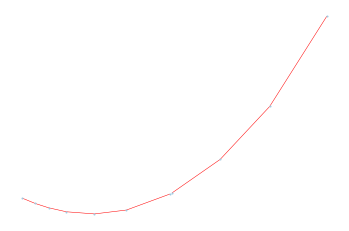

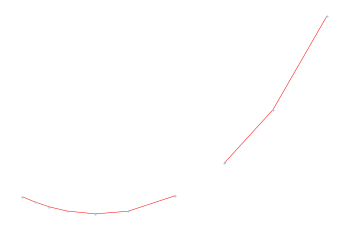

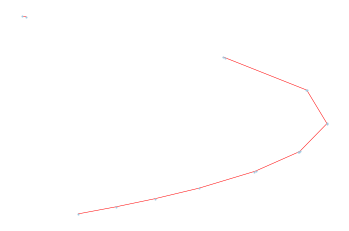

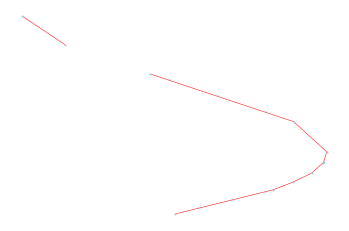

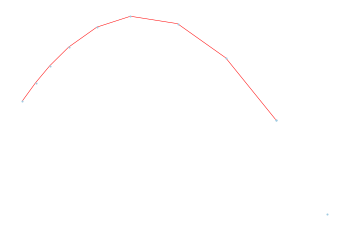

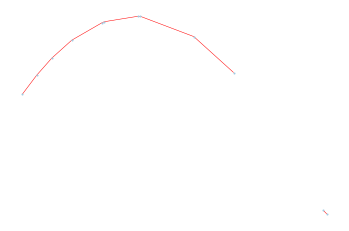

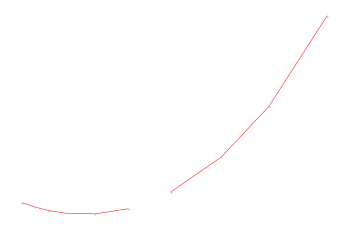

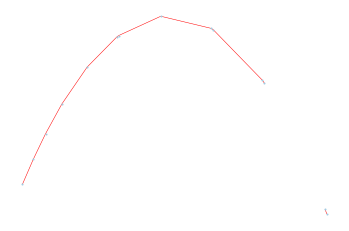

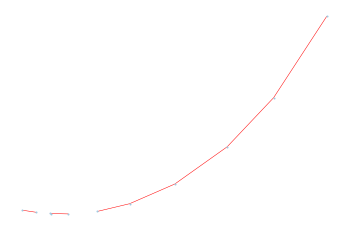

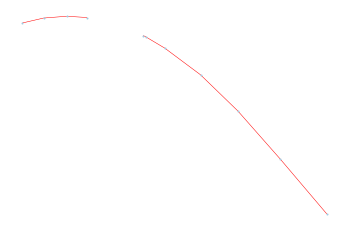

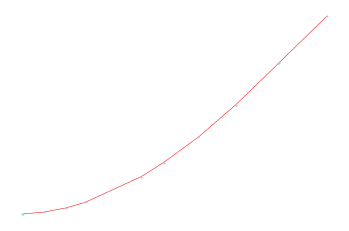

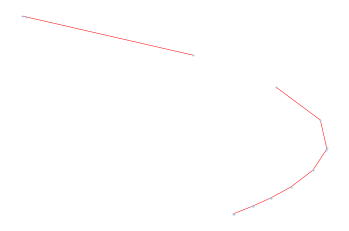

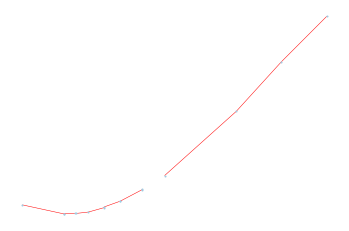

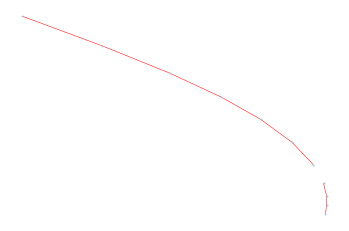

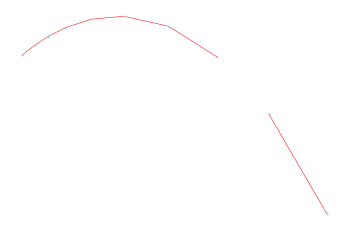

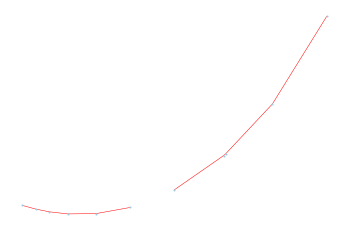

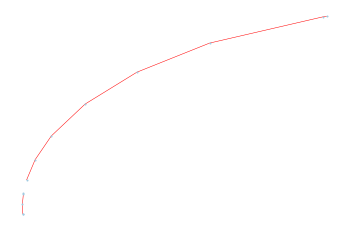

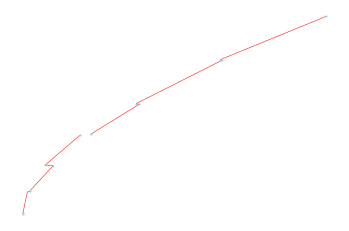

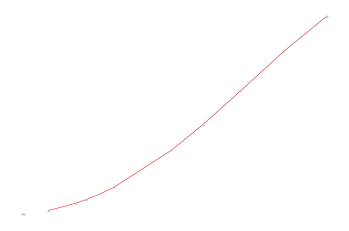

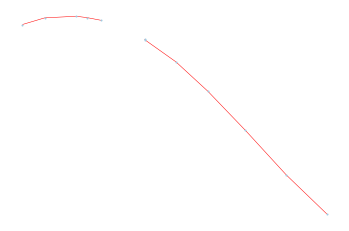

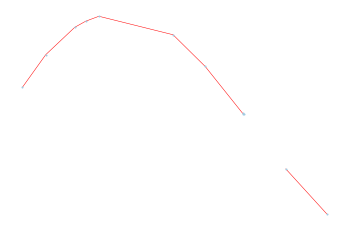

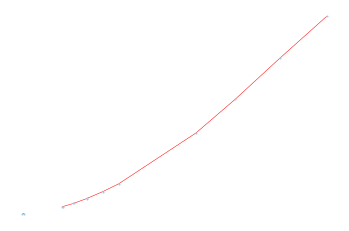

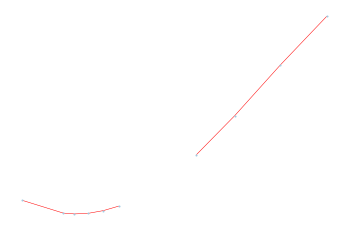

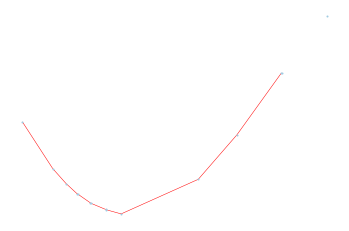

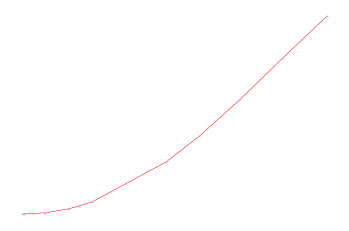

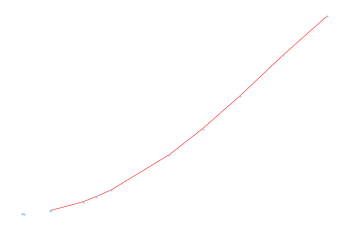

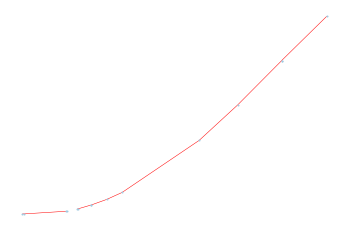

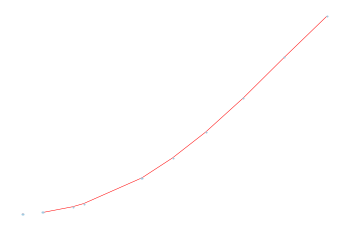

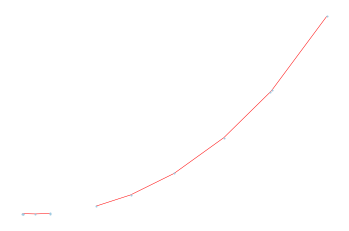

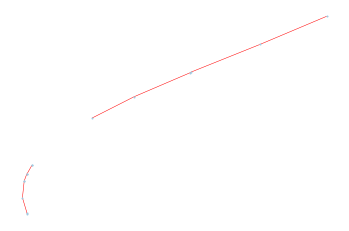

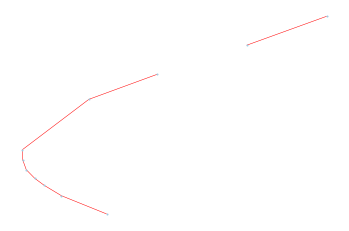

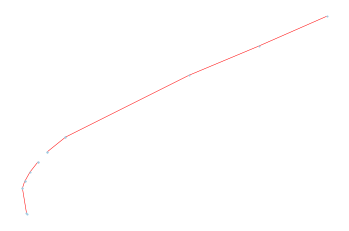

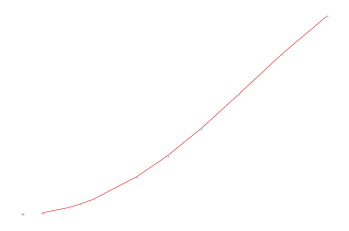

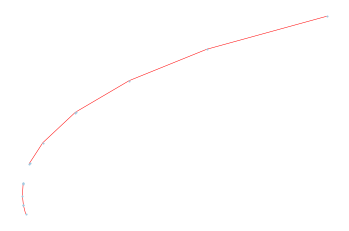

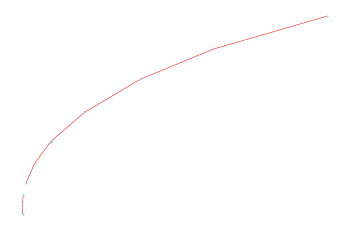

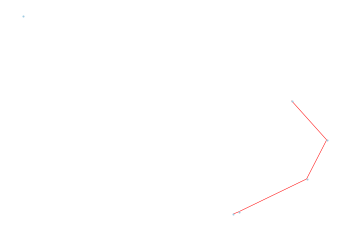

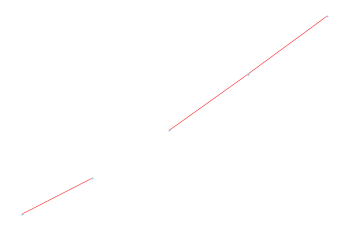

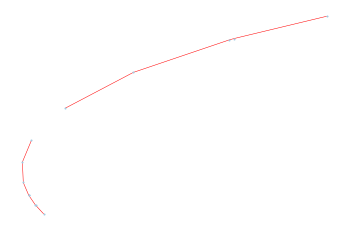

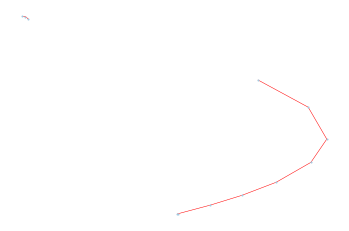

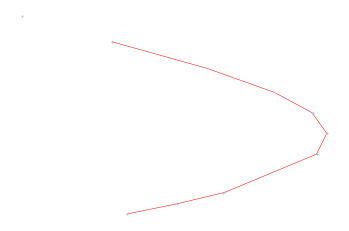

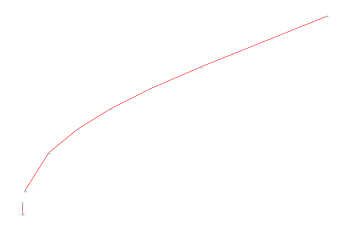

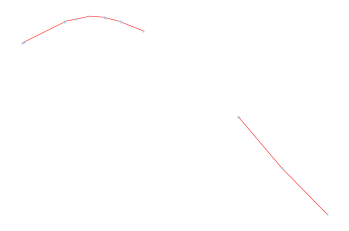

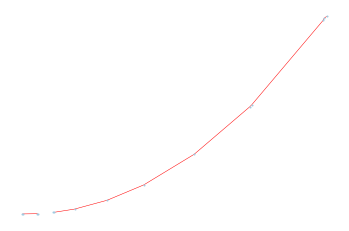

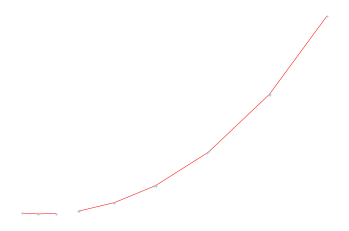

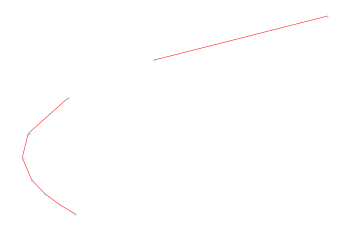

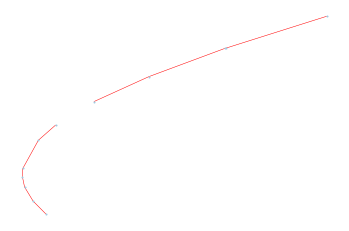

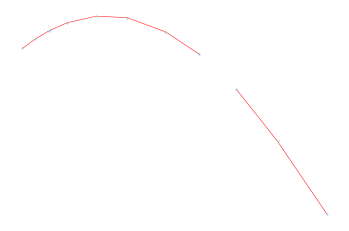

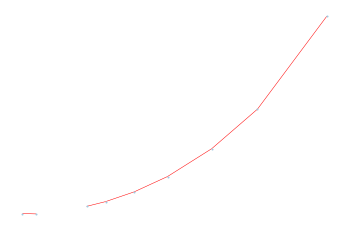

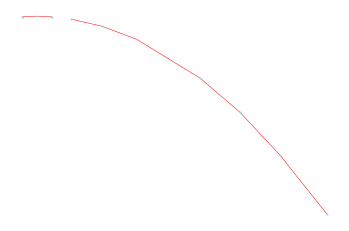

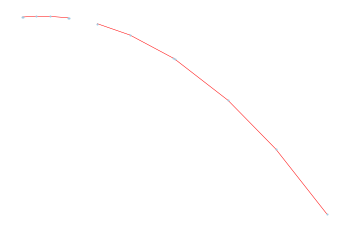

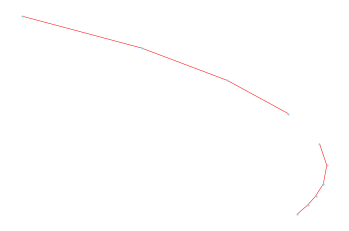

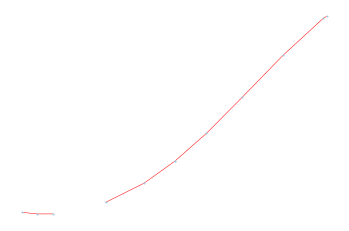

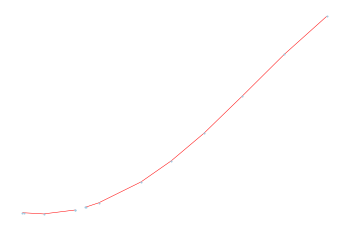

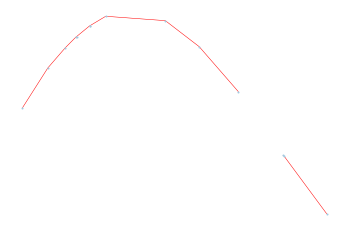

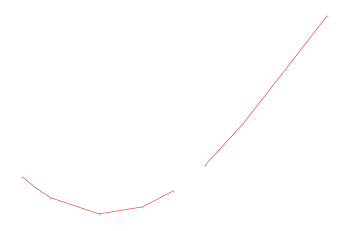

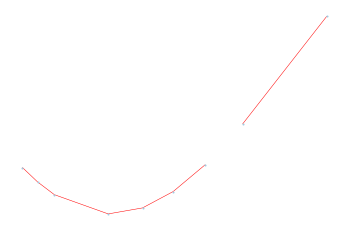

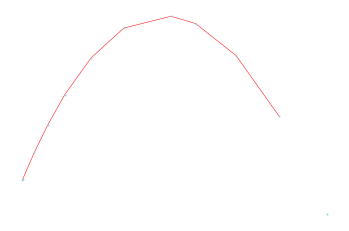

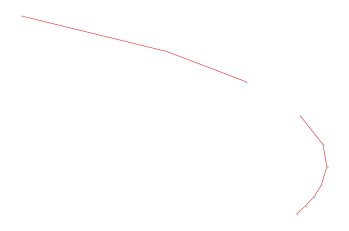

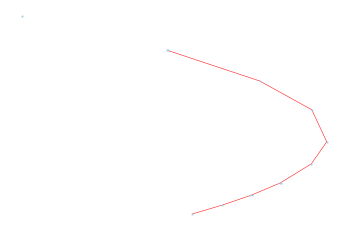

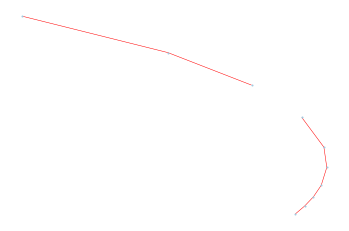

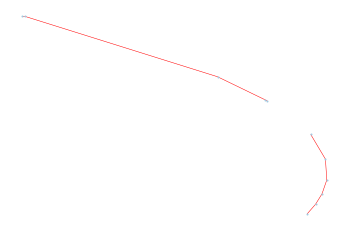

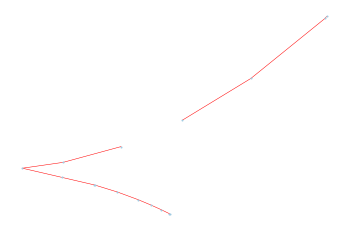

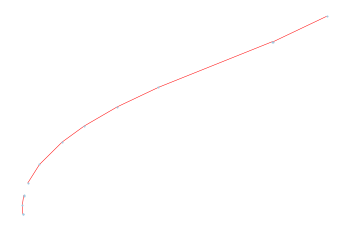

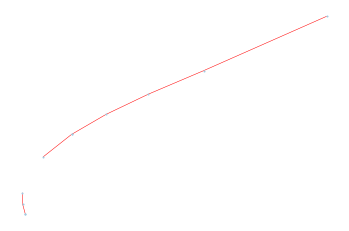

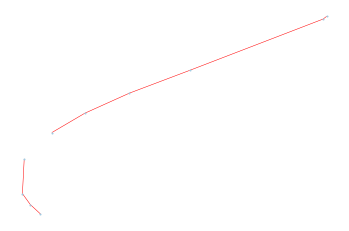

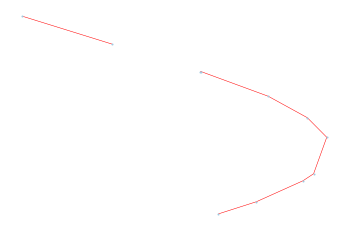

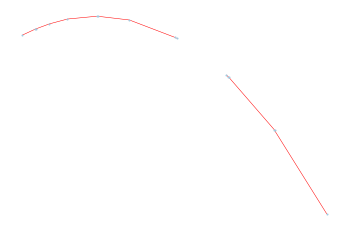

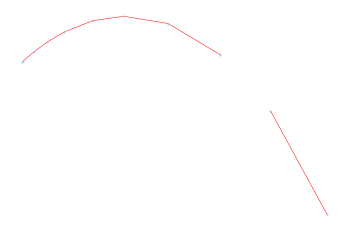

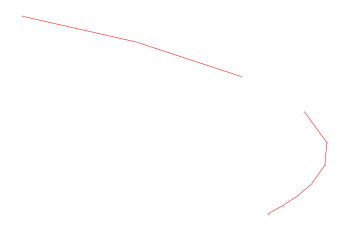

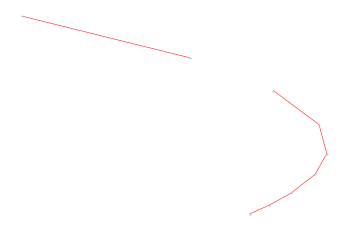

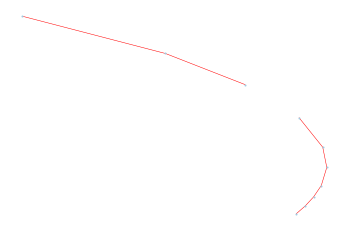

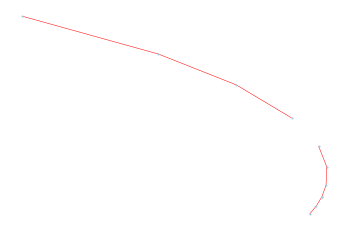

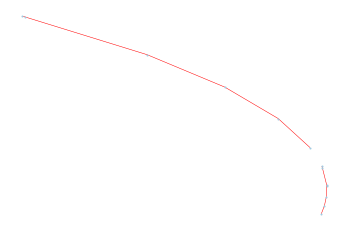

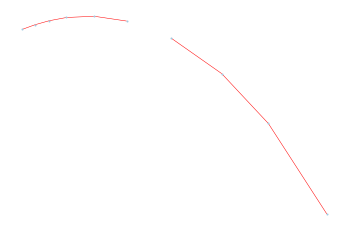

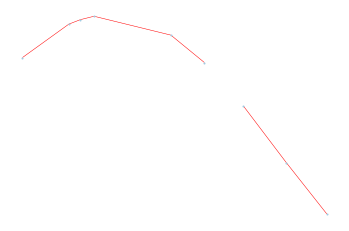

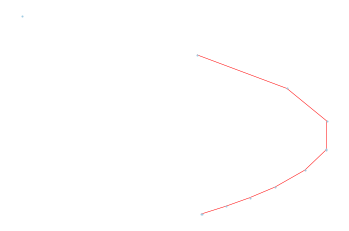

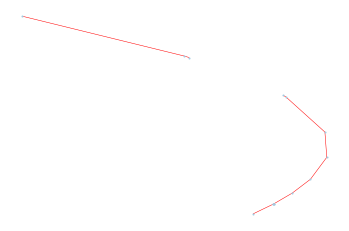

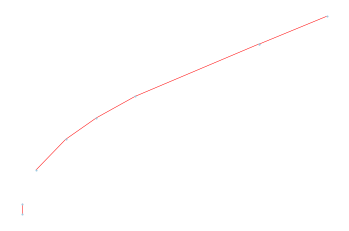

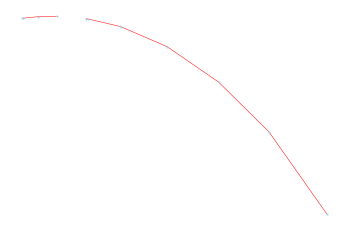

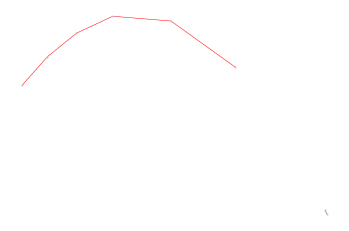

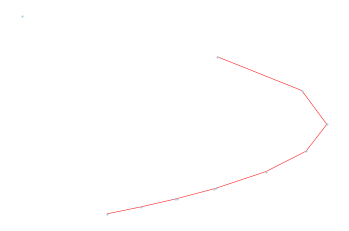

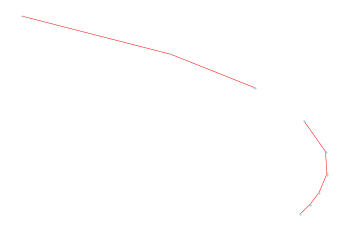

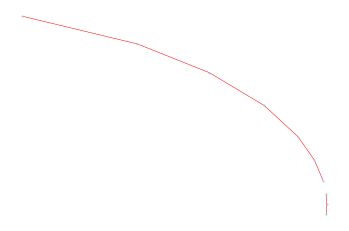

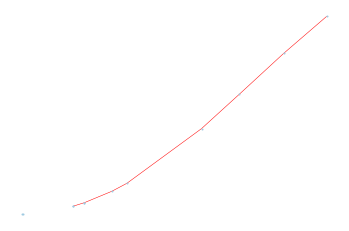

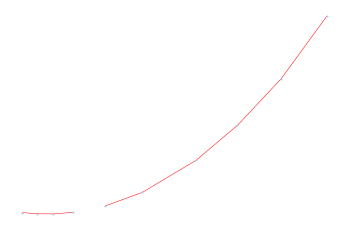

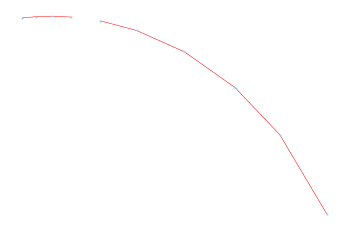

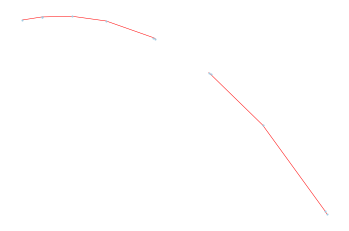

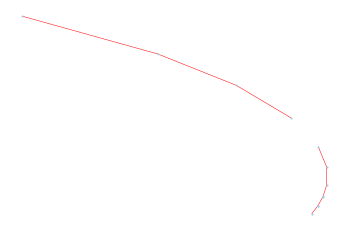

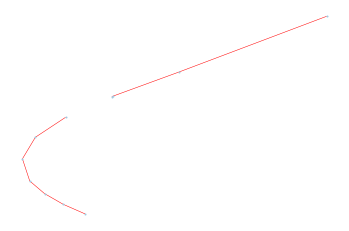

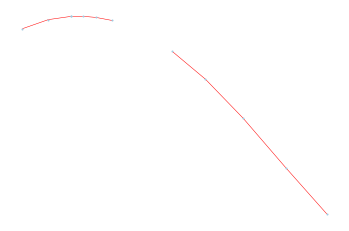

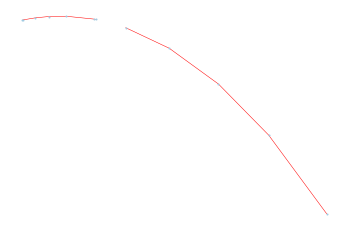

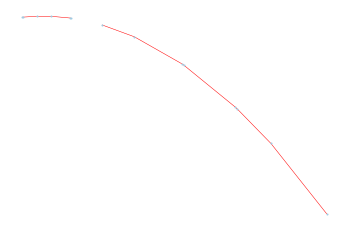

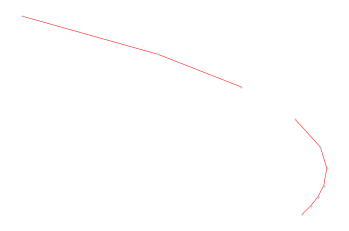

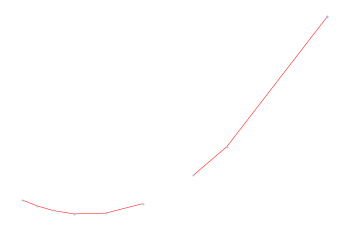

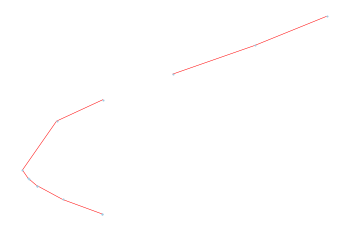

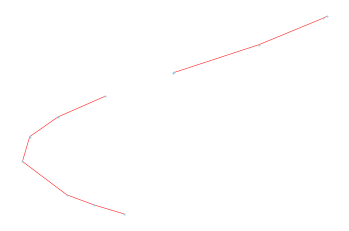

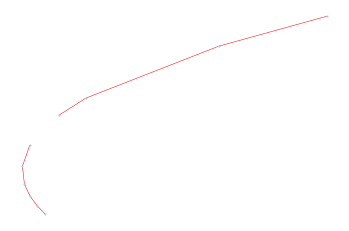

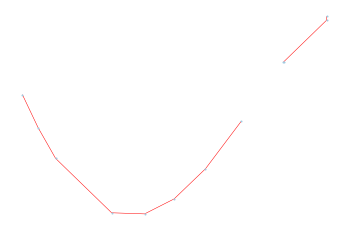

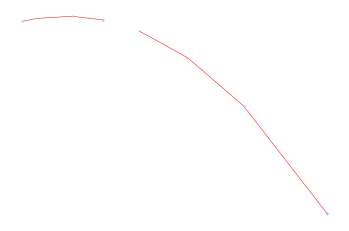

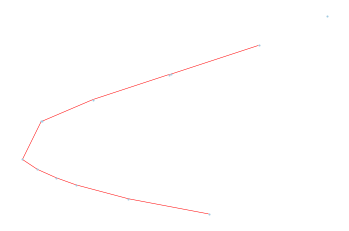

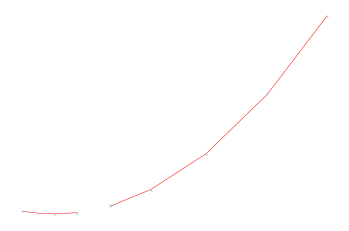

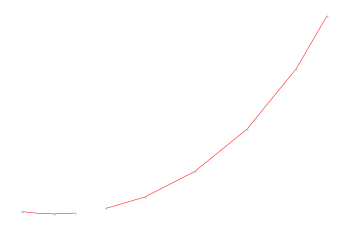

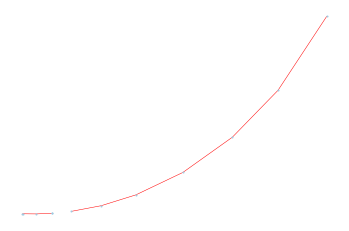

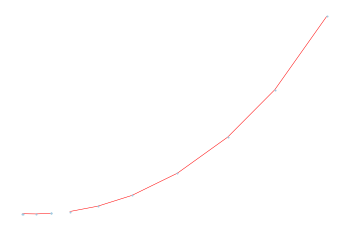

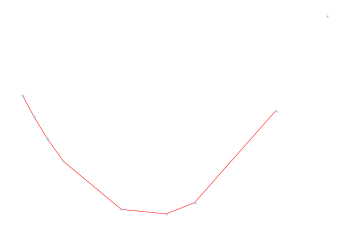

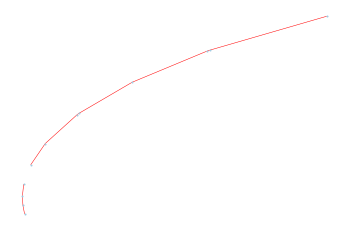

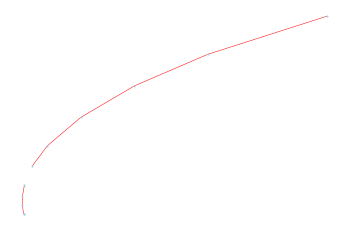

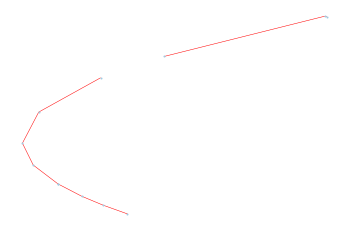

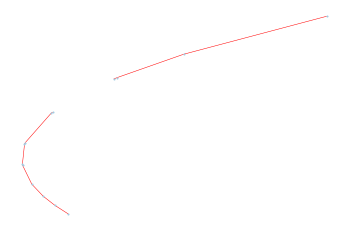

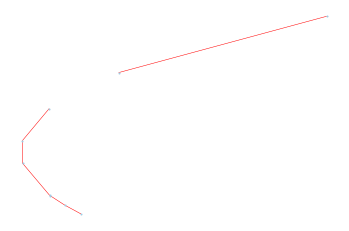

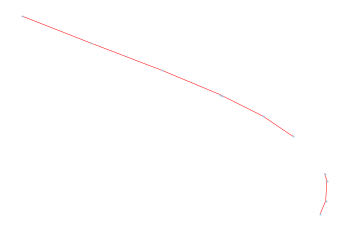

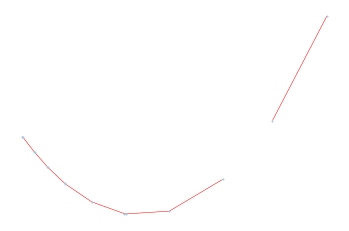

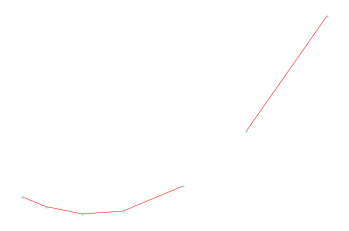

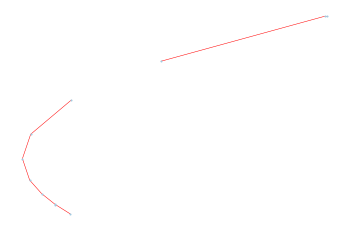

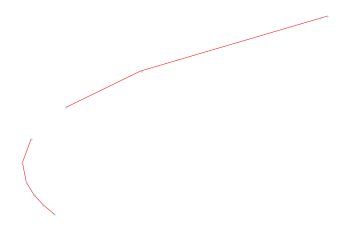

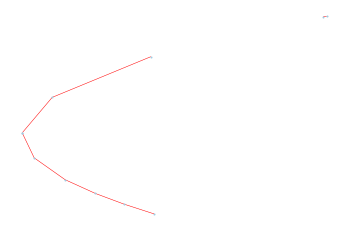

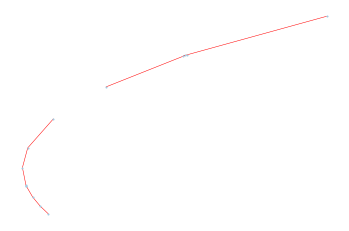

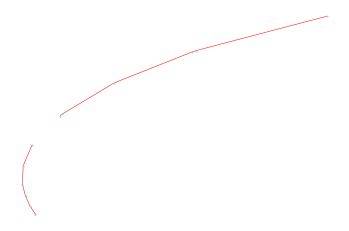

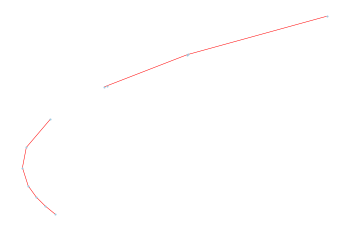

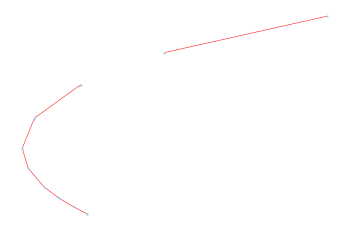

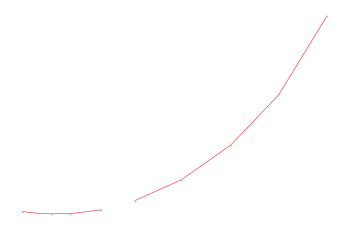

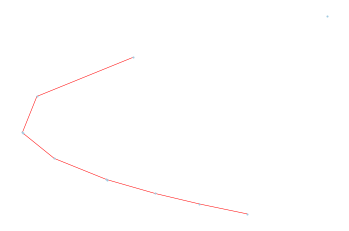

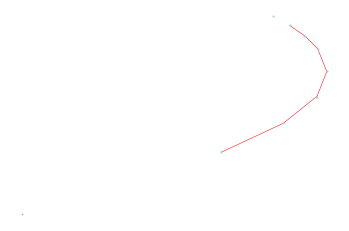

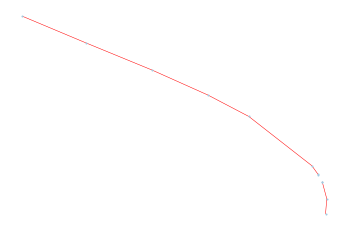

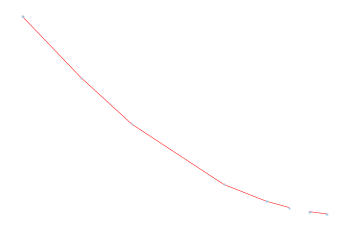

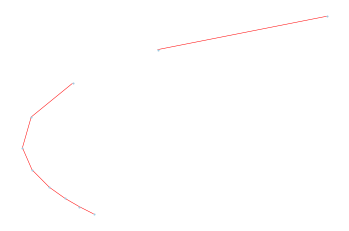

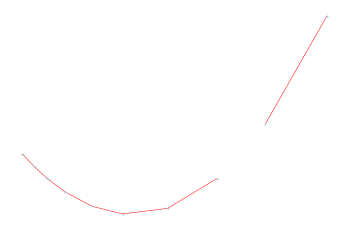

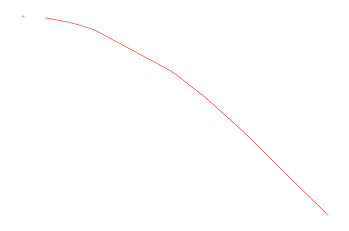

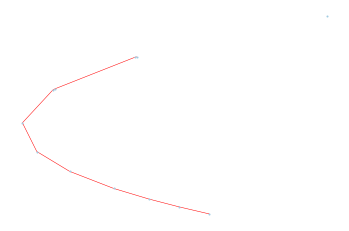

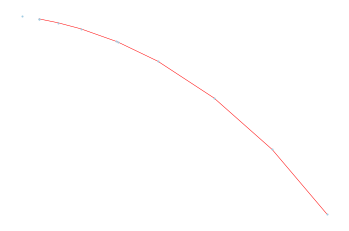

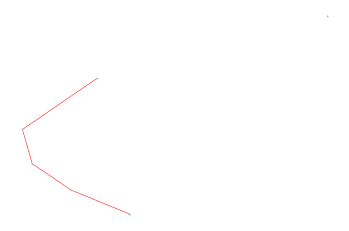

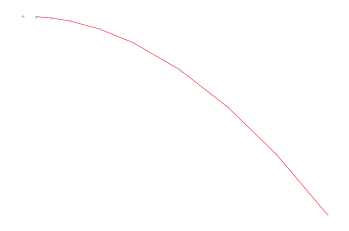

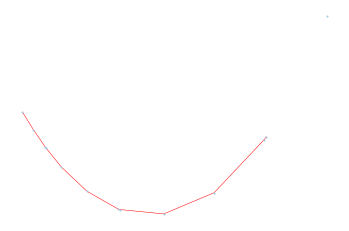

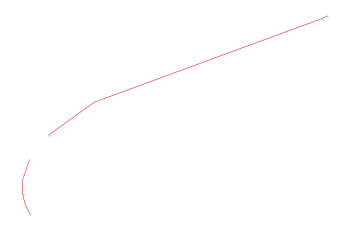

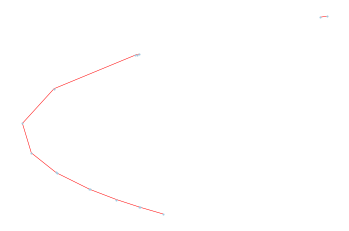

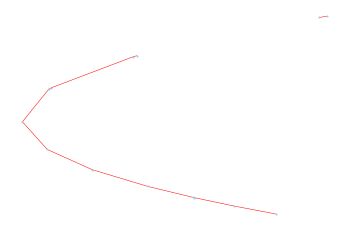

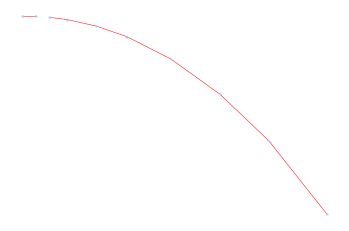

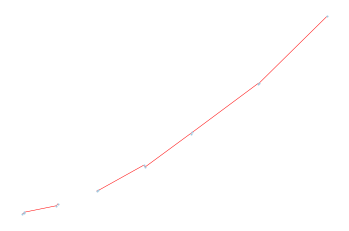

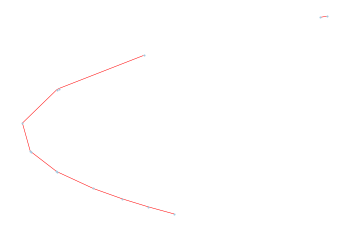

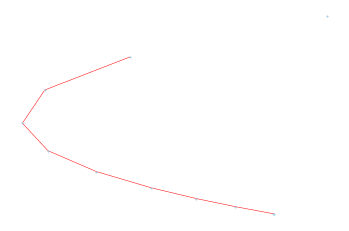

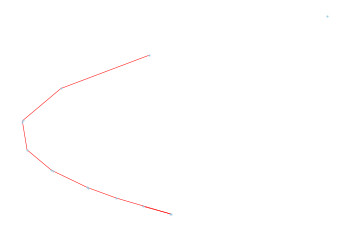

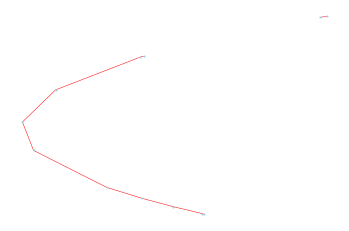

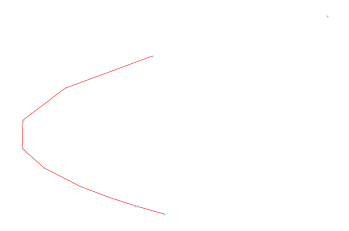

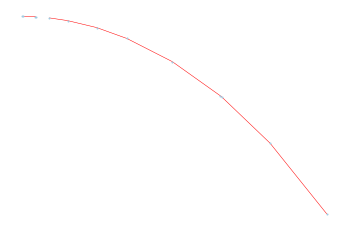

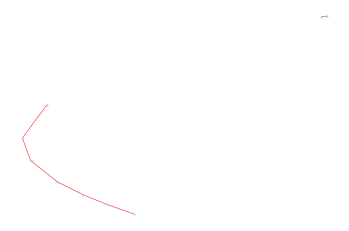

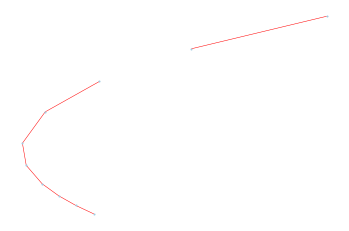

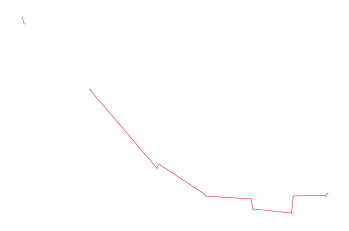

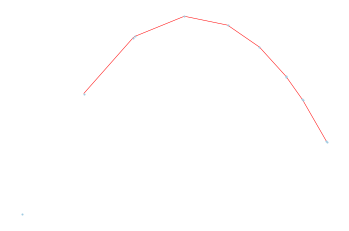

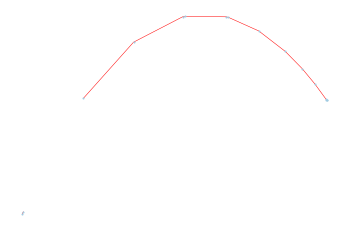

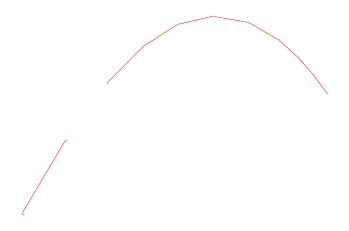

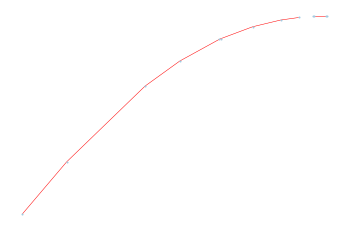

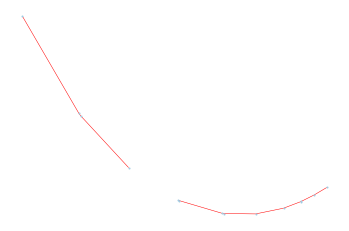

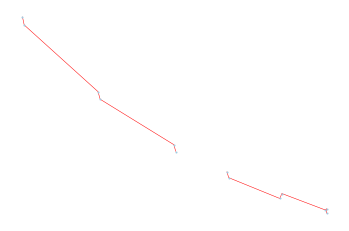

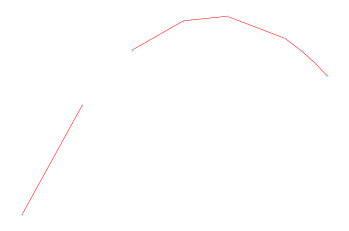

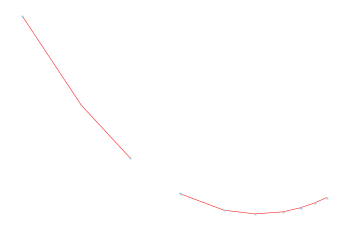

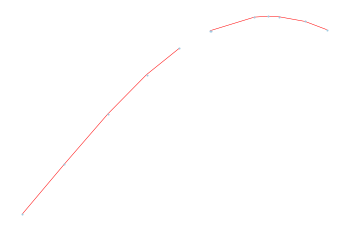

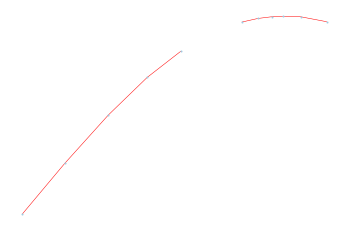

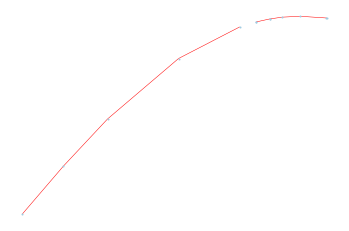

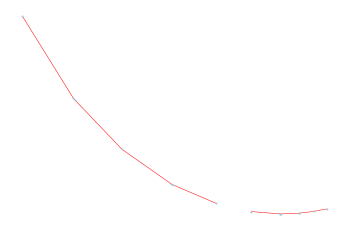

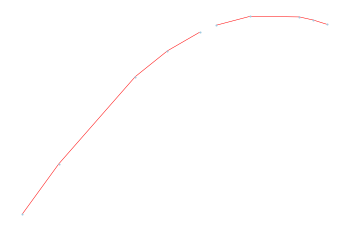

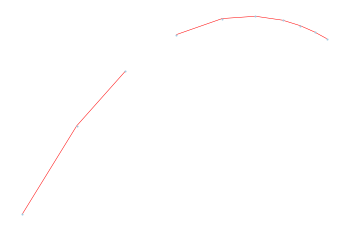

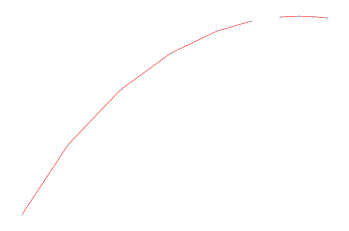

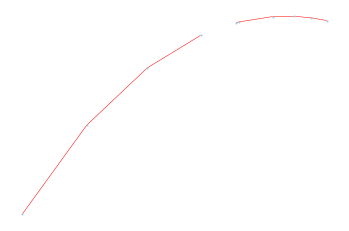

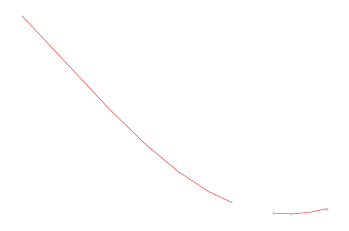

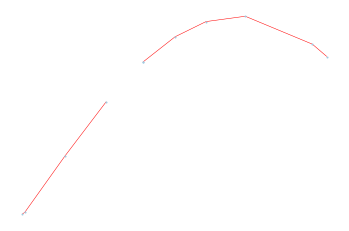

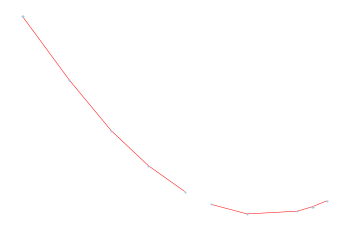

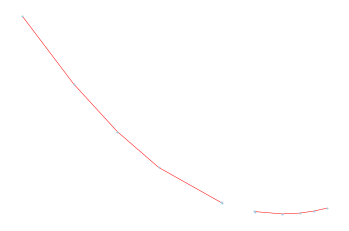

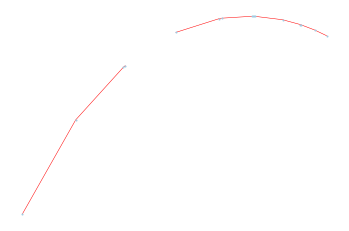

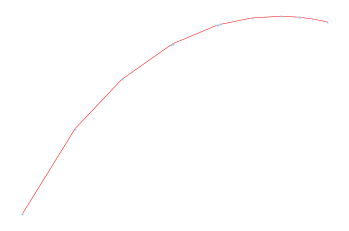

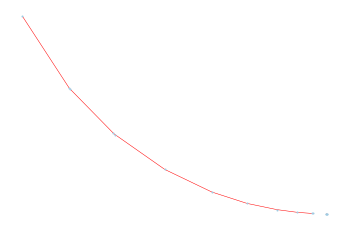

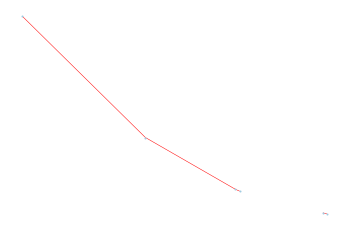

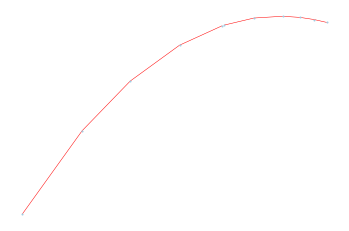

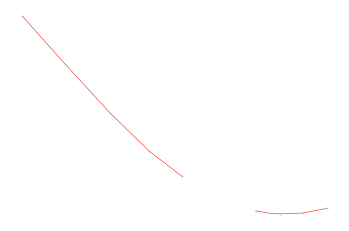

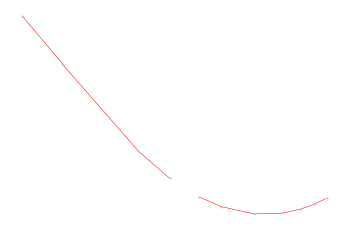

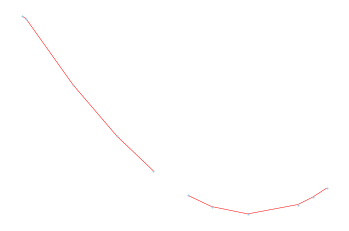

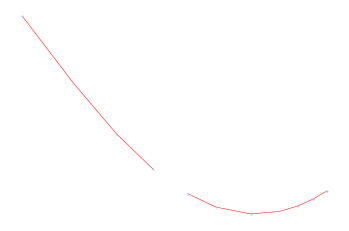

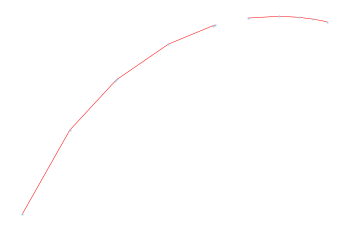

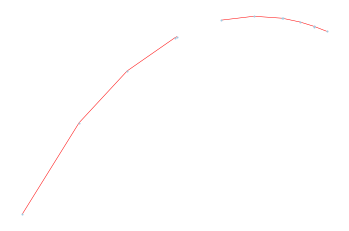

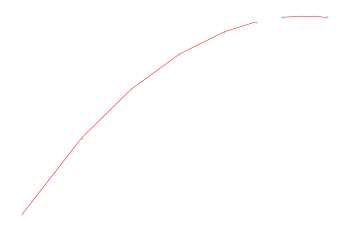

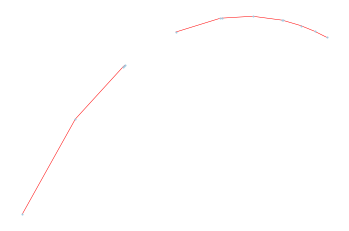

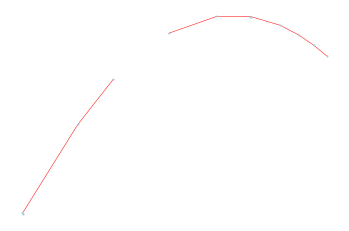

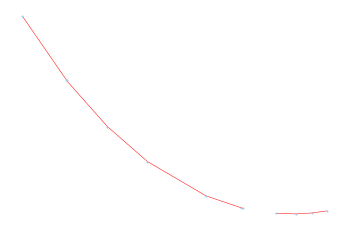

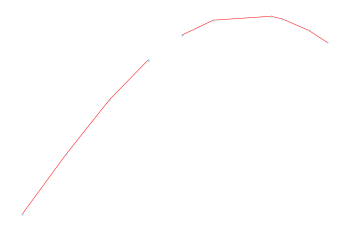

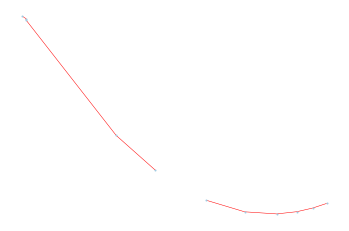

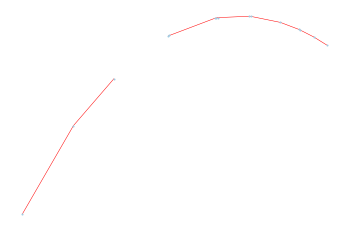

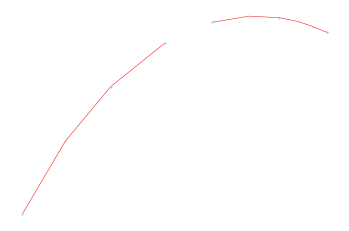

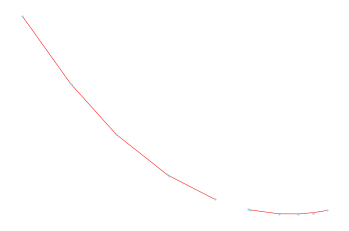

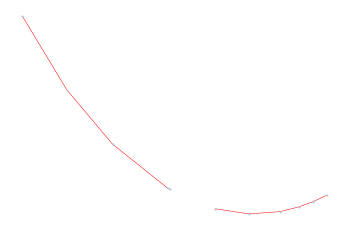

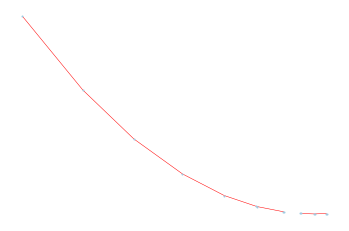

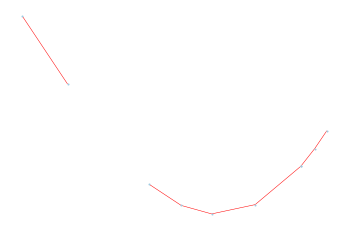

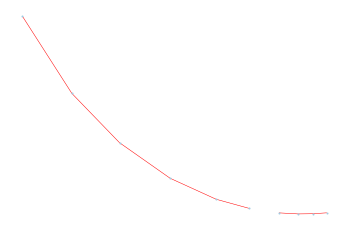

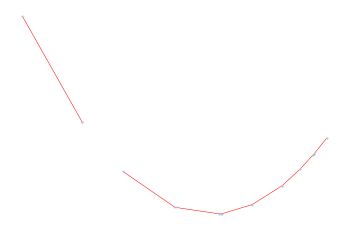

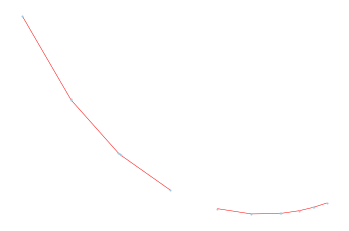

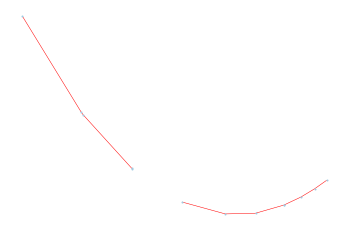

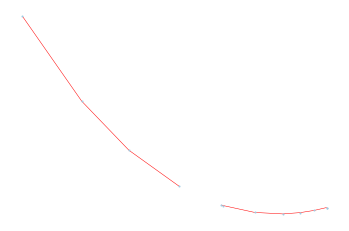

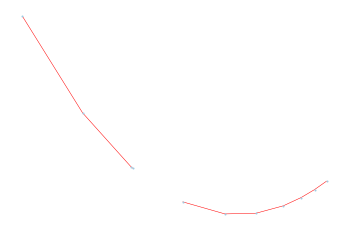

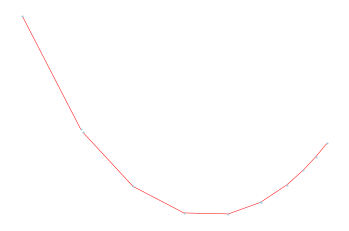

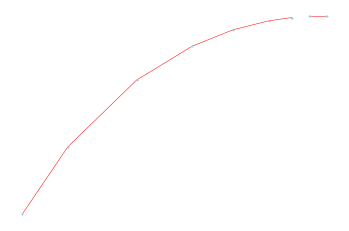

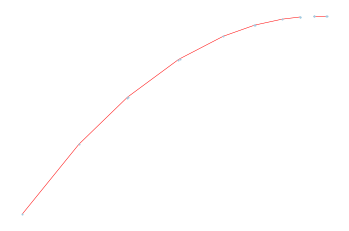

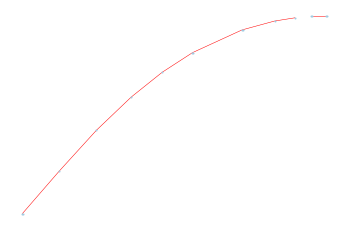

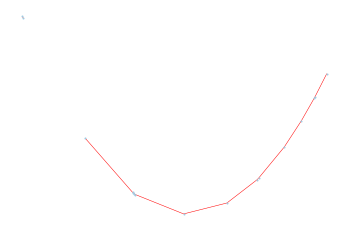

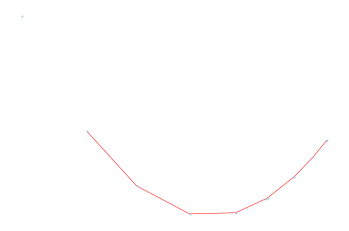

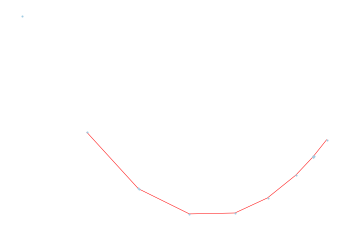

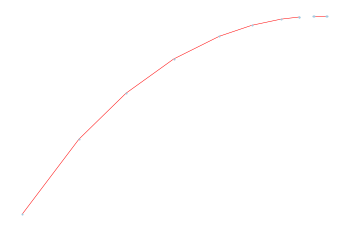

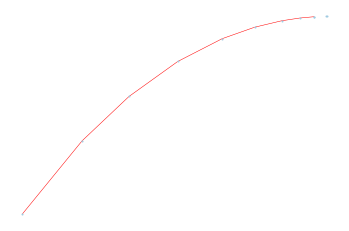

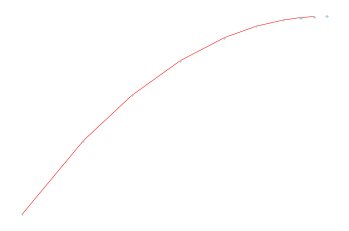

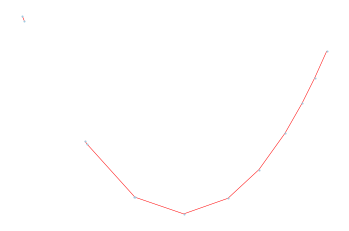

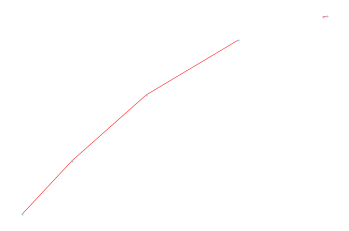

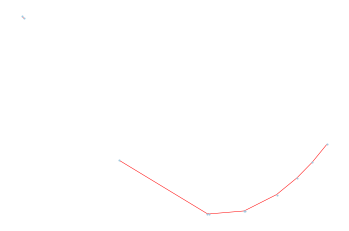

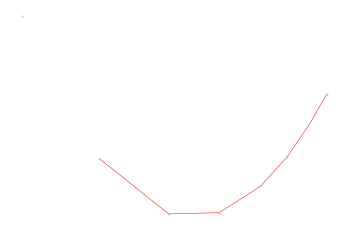

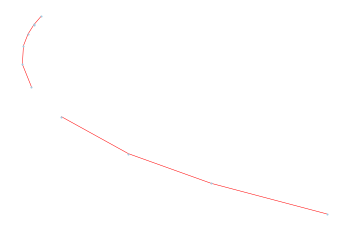

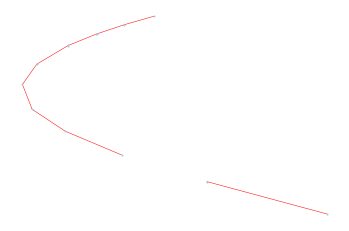

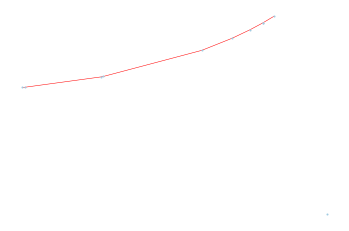

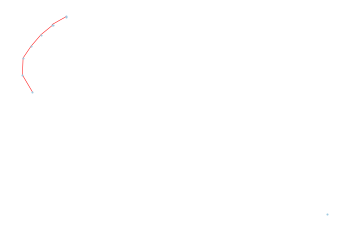

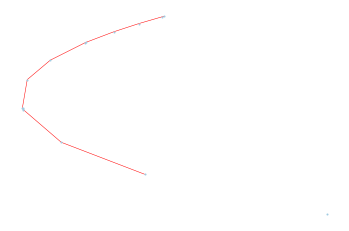

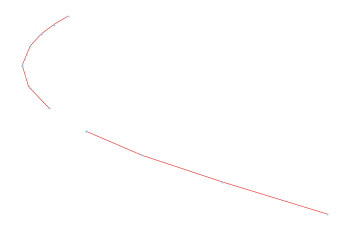

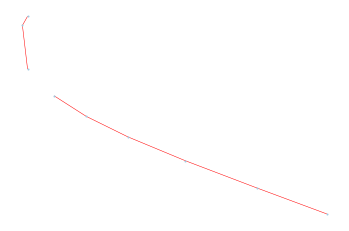

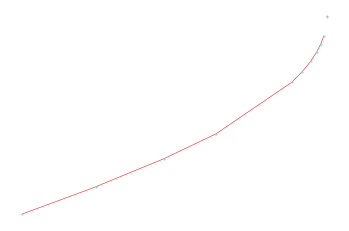

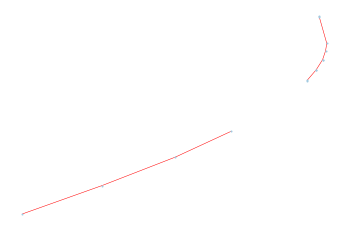

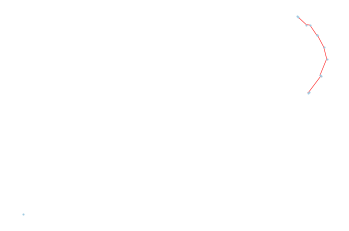

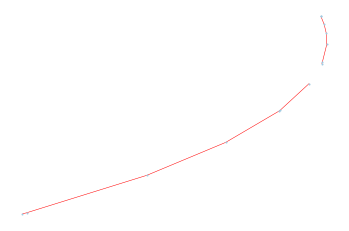

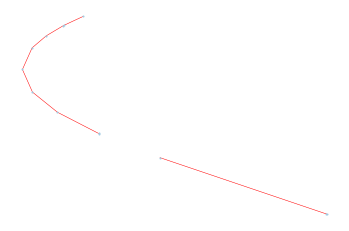

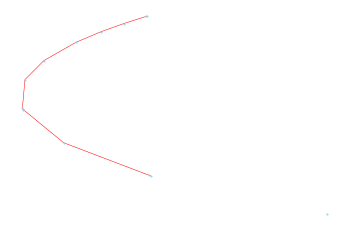

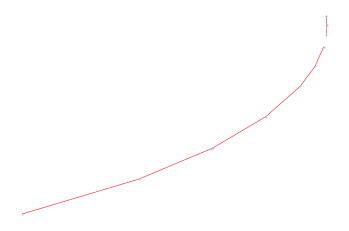

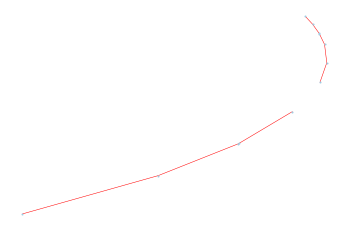

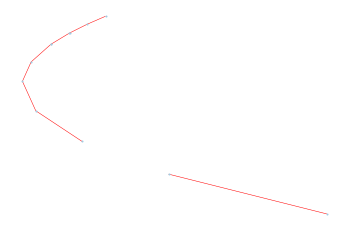

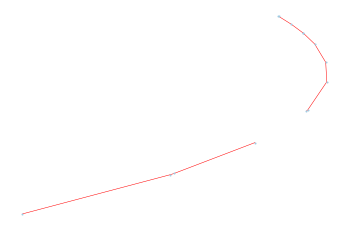

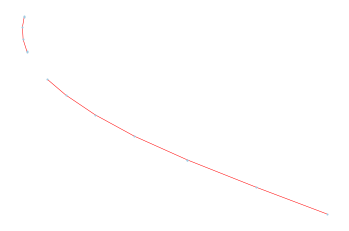

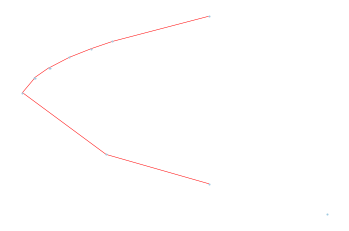

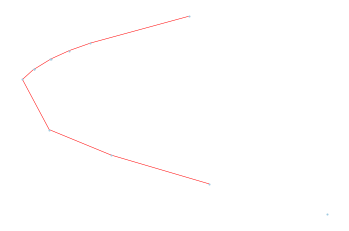

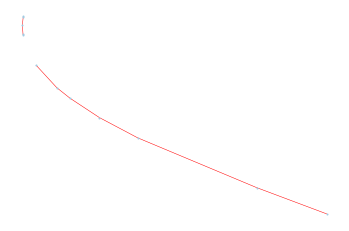

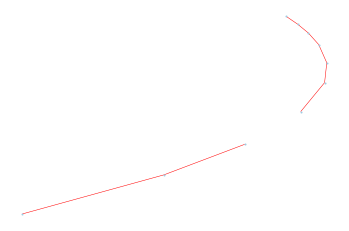

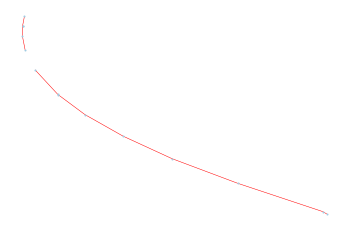

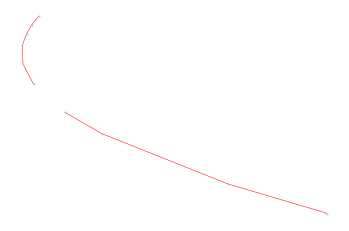

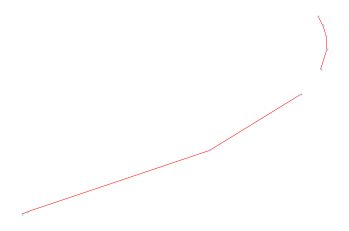

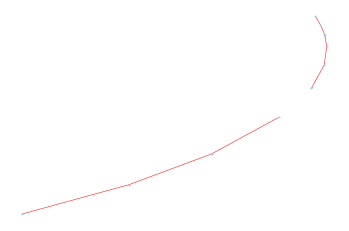

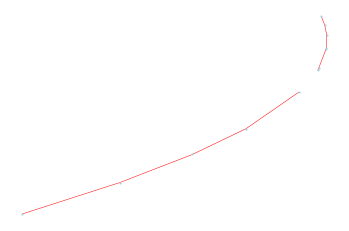

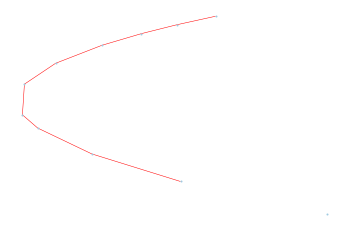

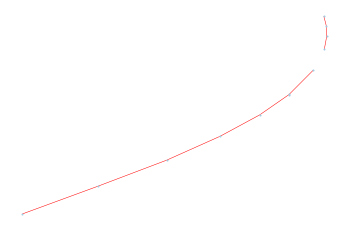

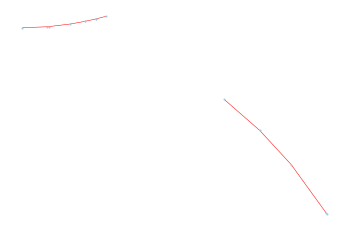

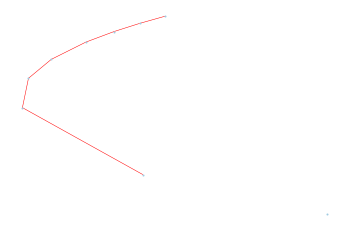

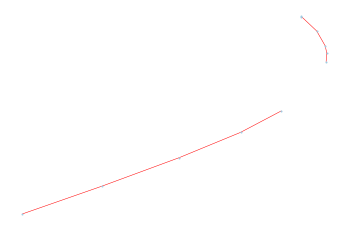

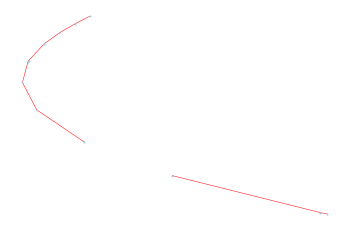

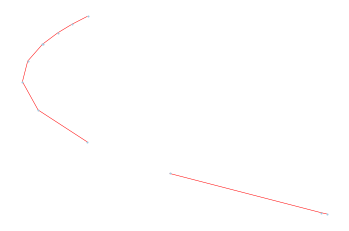

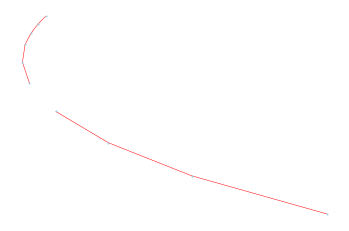

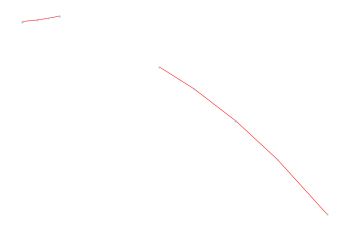

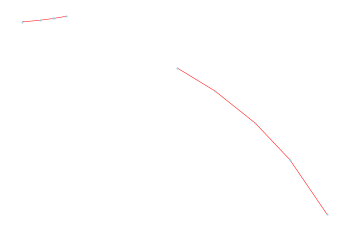

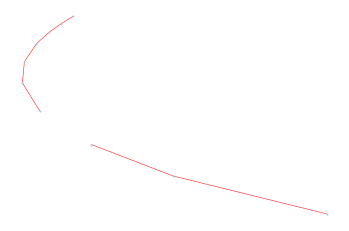

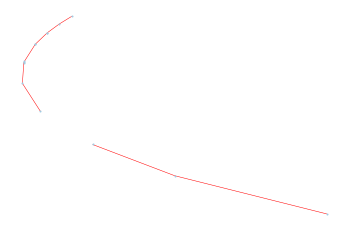

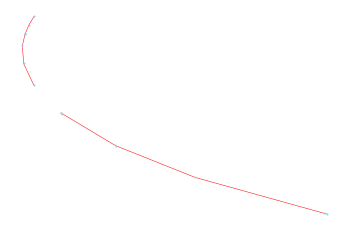

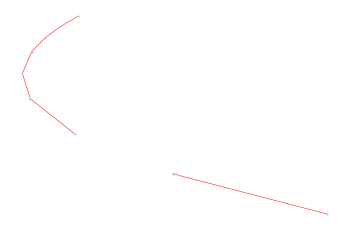

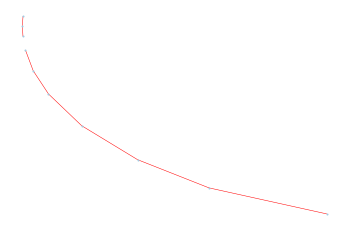

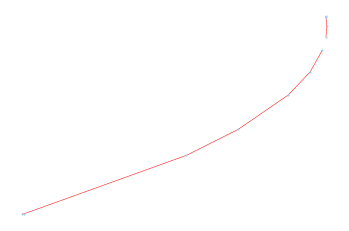

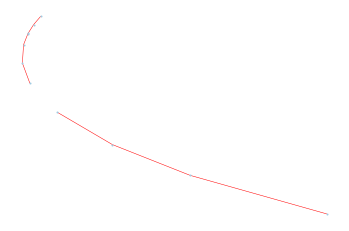

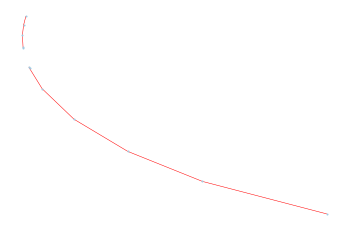

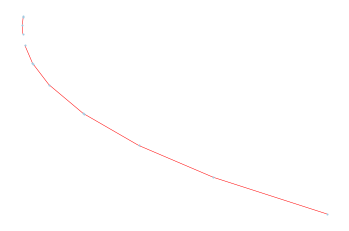

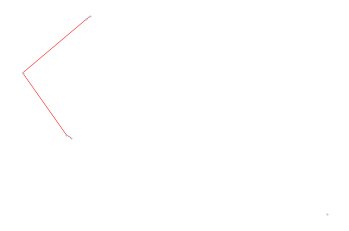

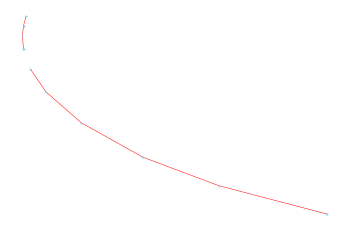

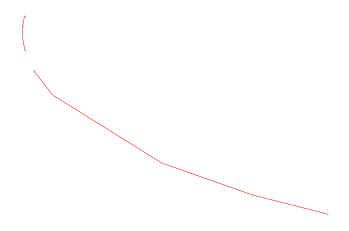

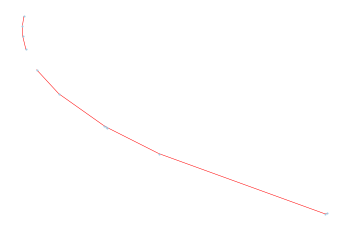

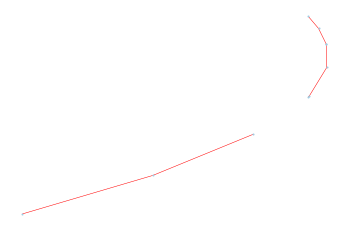

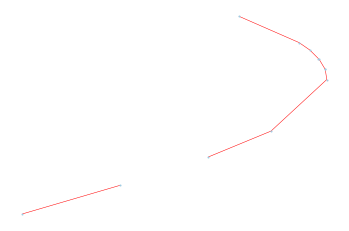

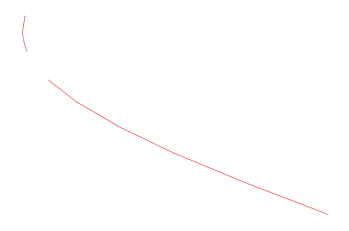

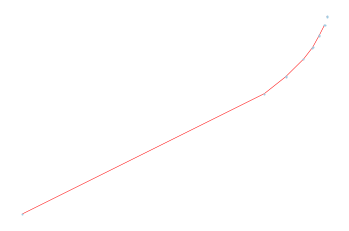

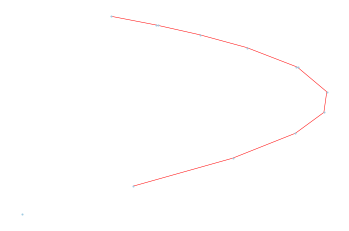

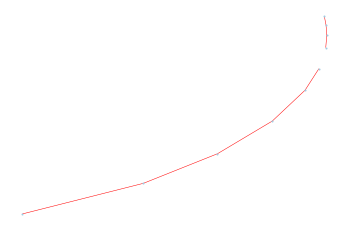

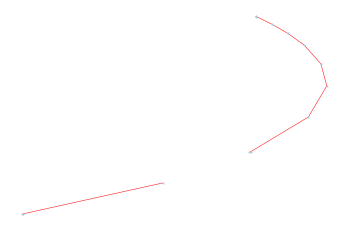

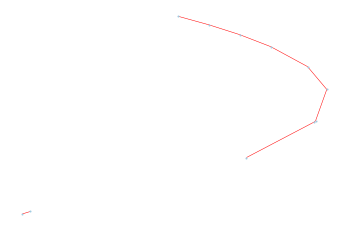

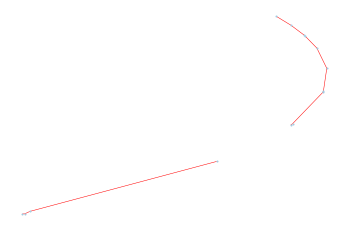

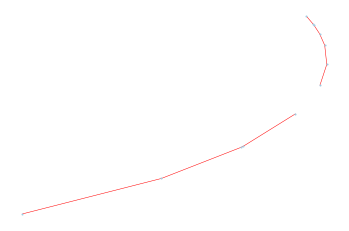

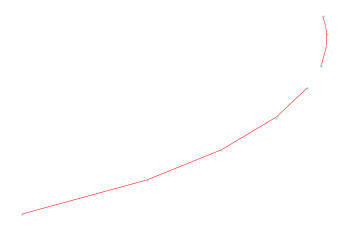

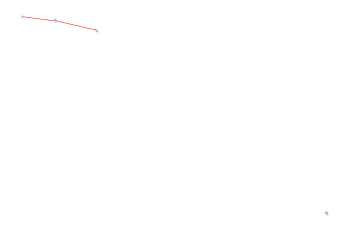

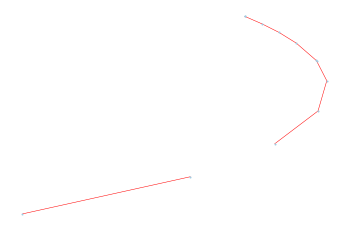

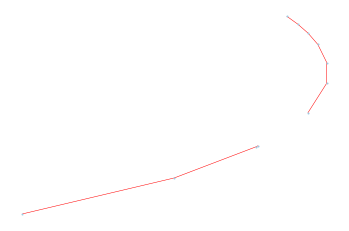

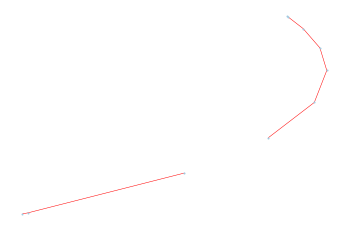

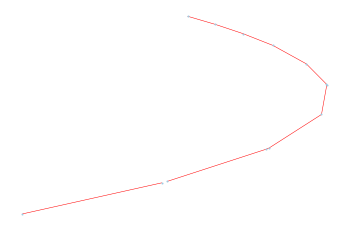

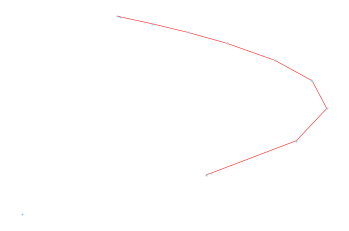

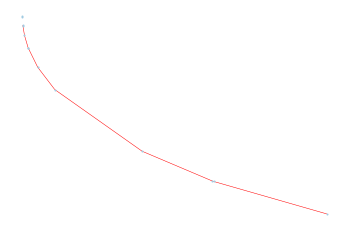

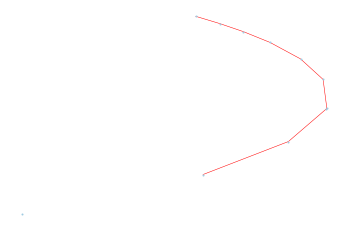

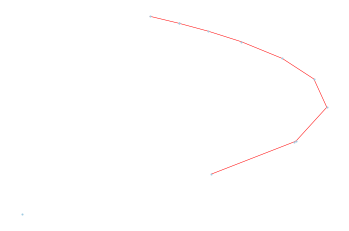

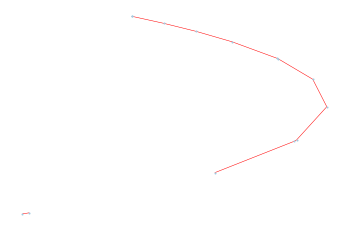

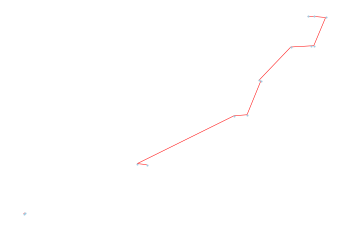

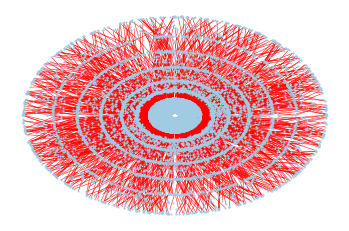

In [44]:
# these paths should all be connected:


# for key in every_segmented_components:
#     gg2 = nx.Graph()
#     path_list = every_segmented_components[key]
#     for path in path_list:
#         gg = nx.subgraph(G, path.hits)
#         gg2 = nx.union(gg, gg2)
    
#     utils_plot.plot_networkx(gg2)

for key in every_segmented_components:
    gg2 = nx.Graph()

    path_list = every_segmented_components[key]
    for path in path_list:
        gg = nx.subgraph(G, path.hits)
        gg2 = nx.union(gg, gg2)

    utils_plot.plot_networkx(gg2)
#         print(gg2.nodes(data=True))
        
#         print("{:.0f}".format(gg2.node[54401]['particle_id']))
#         print(gg2.nodes())
        
        
        
    
utils_plot.plot_networkx(G_joint)
